<a href="https://colab.research.google.com/github/Praveenrpw/AI_ModelLab/blob/main/ML_models/Student_Data_Prediction_using_Logistic_Regression_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/StudentsPerformance.csv")

In [ ]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [ ]:
df.shape

(1000, 8)

In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df["mean_score"] = ((df["math score"] + df["reading score"]  + df["writing score"] / 3)).round()
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean_score
0,female,group B,bachelor's degree,standard,none,72,72,74,169.0
1,female,group C,some college,standard,completed,69,90,88,188.0
2,female,group B,master's degree,standard,none,90,95,93,216.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,119.0
4,male,group C,some college,standard,none,76,78,75,179.0
5,female,group B,associate's degree,standard,none,71,83,78,180.0
6,female,group B,some college,standard,completed,88,95,92,214.0
7,male,group B,some college,free/reduced,none,40,43,39,96.0
8,male,group D,high school,free/reduced,completed,64,64,67,150.0
9,female,group B,high school,free/reduced,none,38,60,50,115.0


In [ ]:
df["gender"].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [ ]:
df["race/ethnicity"].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [ ]:
df["parental level of education"].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [ ]:
df["lunch"].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

In [ ]:
df["test preparation course"].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

In [ ]:
df["math score"].value_counts()

math score
65    36
62    35
69    32
59    32
61    27
      ..
24     1
28     1
33     1
18     1
8      1
Name: count, Length: 81, dtype: int64

In [ ]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
df["gender"] = lc.fit_transform(df["gender"])
df["race/ethnicity"] = lc.fit_transform(df["race/ethnicity"])
df["parental level of education"] = lc.fit_transform(df["parental level of education"])
df["lunch"] = lc.fit_transform(df["lunch"])
df["test preparation course"] = lc.fit_transform(df["test preparation course"])
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean_score
0,0,1,1,1,1,72,72,74,169.0
1,0,2,4,1,0,69,90,88,188.0
2,0,1,3,1,1,90,95,93,216.0
3,1,0,0,0,1,47,57,44,119.0
4,1,2,4,1,1,76,78,75,179.0


<Axes: xlabel='gender', ylabel='count'>

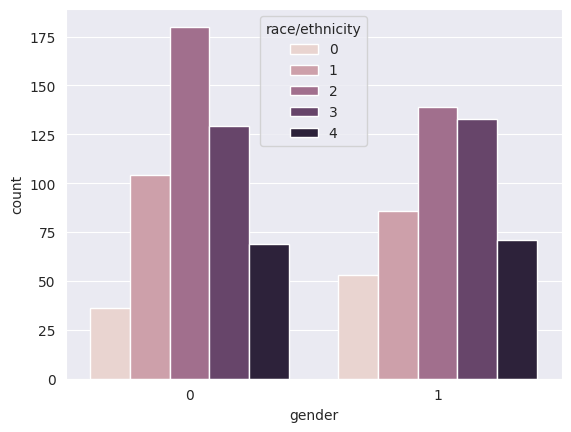

In [ ]:
#Analysis gender and age
#0 is female, 1 is male

sns.countplot(data = df, x = 'gender', hue=  'race/ethnicity')

#There are more females in the class, (mostly from Group C)

In [ ]:
# Analysing Test Preparation Course
# 0 - completed
# 1 - none
df["test preparation course"].value_counts()


test preparation course
1    642
0    358
Name: count, dtype: int64

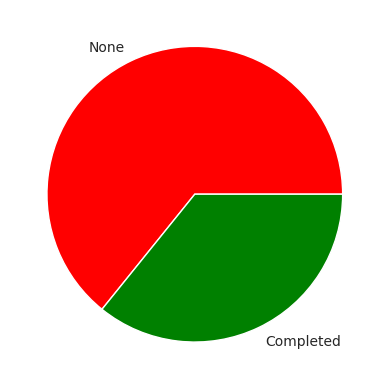

In [ ]:
label = ["None", "Completed"]
colour = ["red", "green"]
plt.pie(df["test preparation course"].value_counts(), labels = label, colors = colour)
plt.show()

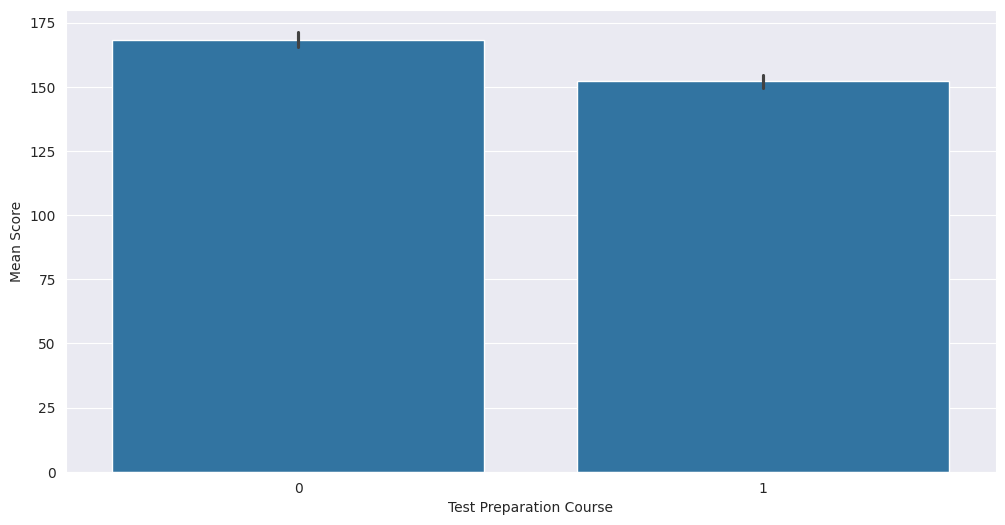

In [ ]:
plt.figure(figsize = (12, 6))
sns.barplot(x = "test preparation course", y = 'mean_score', data = df)
plt.xlabel("Test Preparation Course")
plt.ylabel("Mean Score")
plt.show()

#here 0 students who completed the course has scored good marks

<Axes: xlabel='lunch', ylabel='mean_score'>

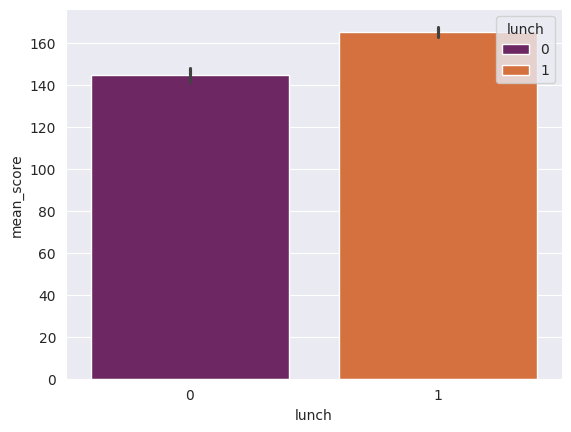

In [ ]:
#analyzing lunch

sns.barplot(x = df["lunch"], y = df["mean_score"], hue = df["lunch"], palette = 'inferno')

#The students who get standard lunch are performing better in exams than the students with free/reduced lunch

<Axes: xlabel='parental level of education', ylabel='mean_score'>

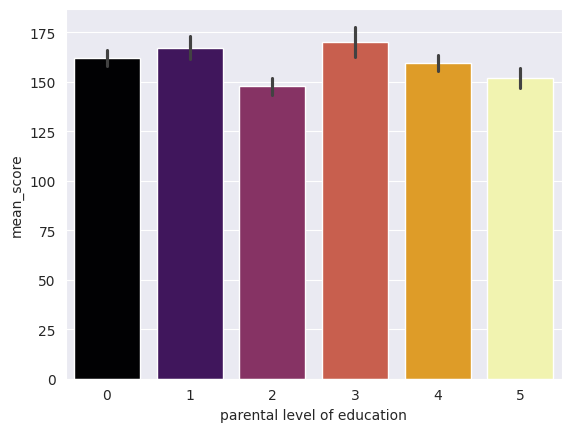

In [ ]:
# Analysing parental level of education
# 2nd Category of Parental Education belongs to High School and 3rd Category belongs to Master Degree therefore Parents Education is directly proportional to Students Marks

sns.barplot(x = 'parental level of education', y = 'mean_score', hue = "parental level of education", data = df, palette = 'inferno', legend = False)

<Figure size 1200x600 with 0 Axes>

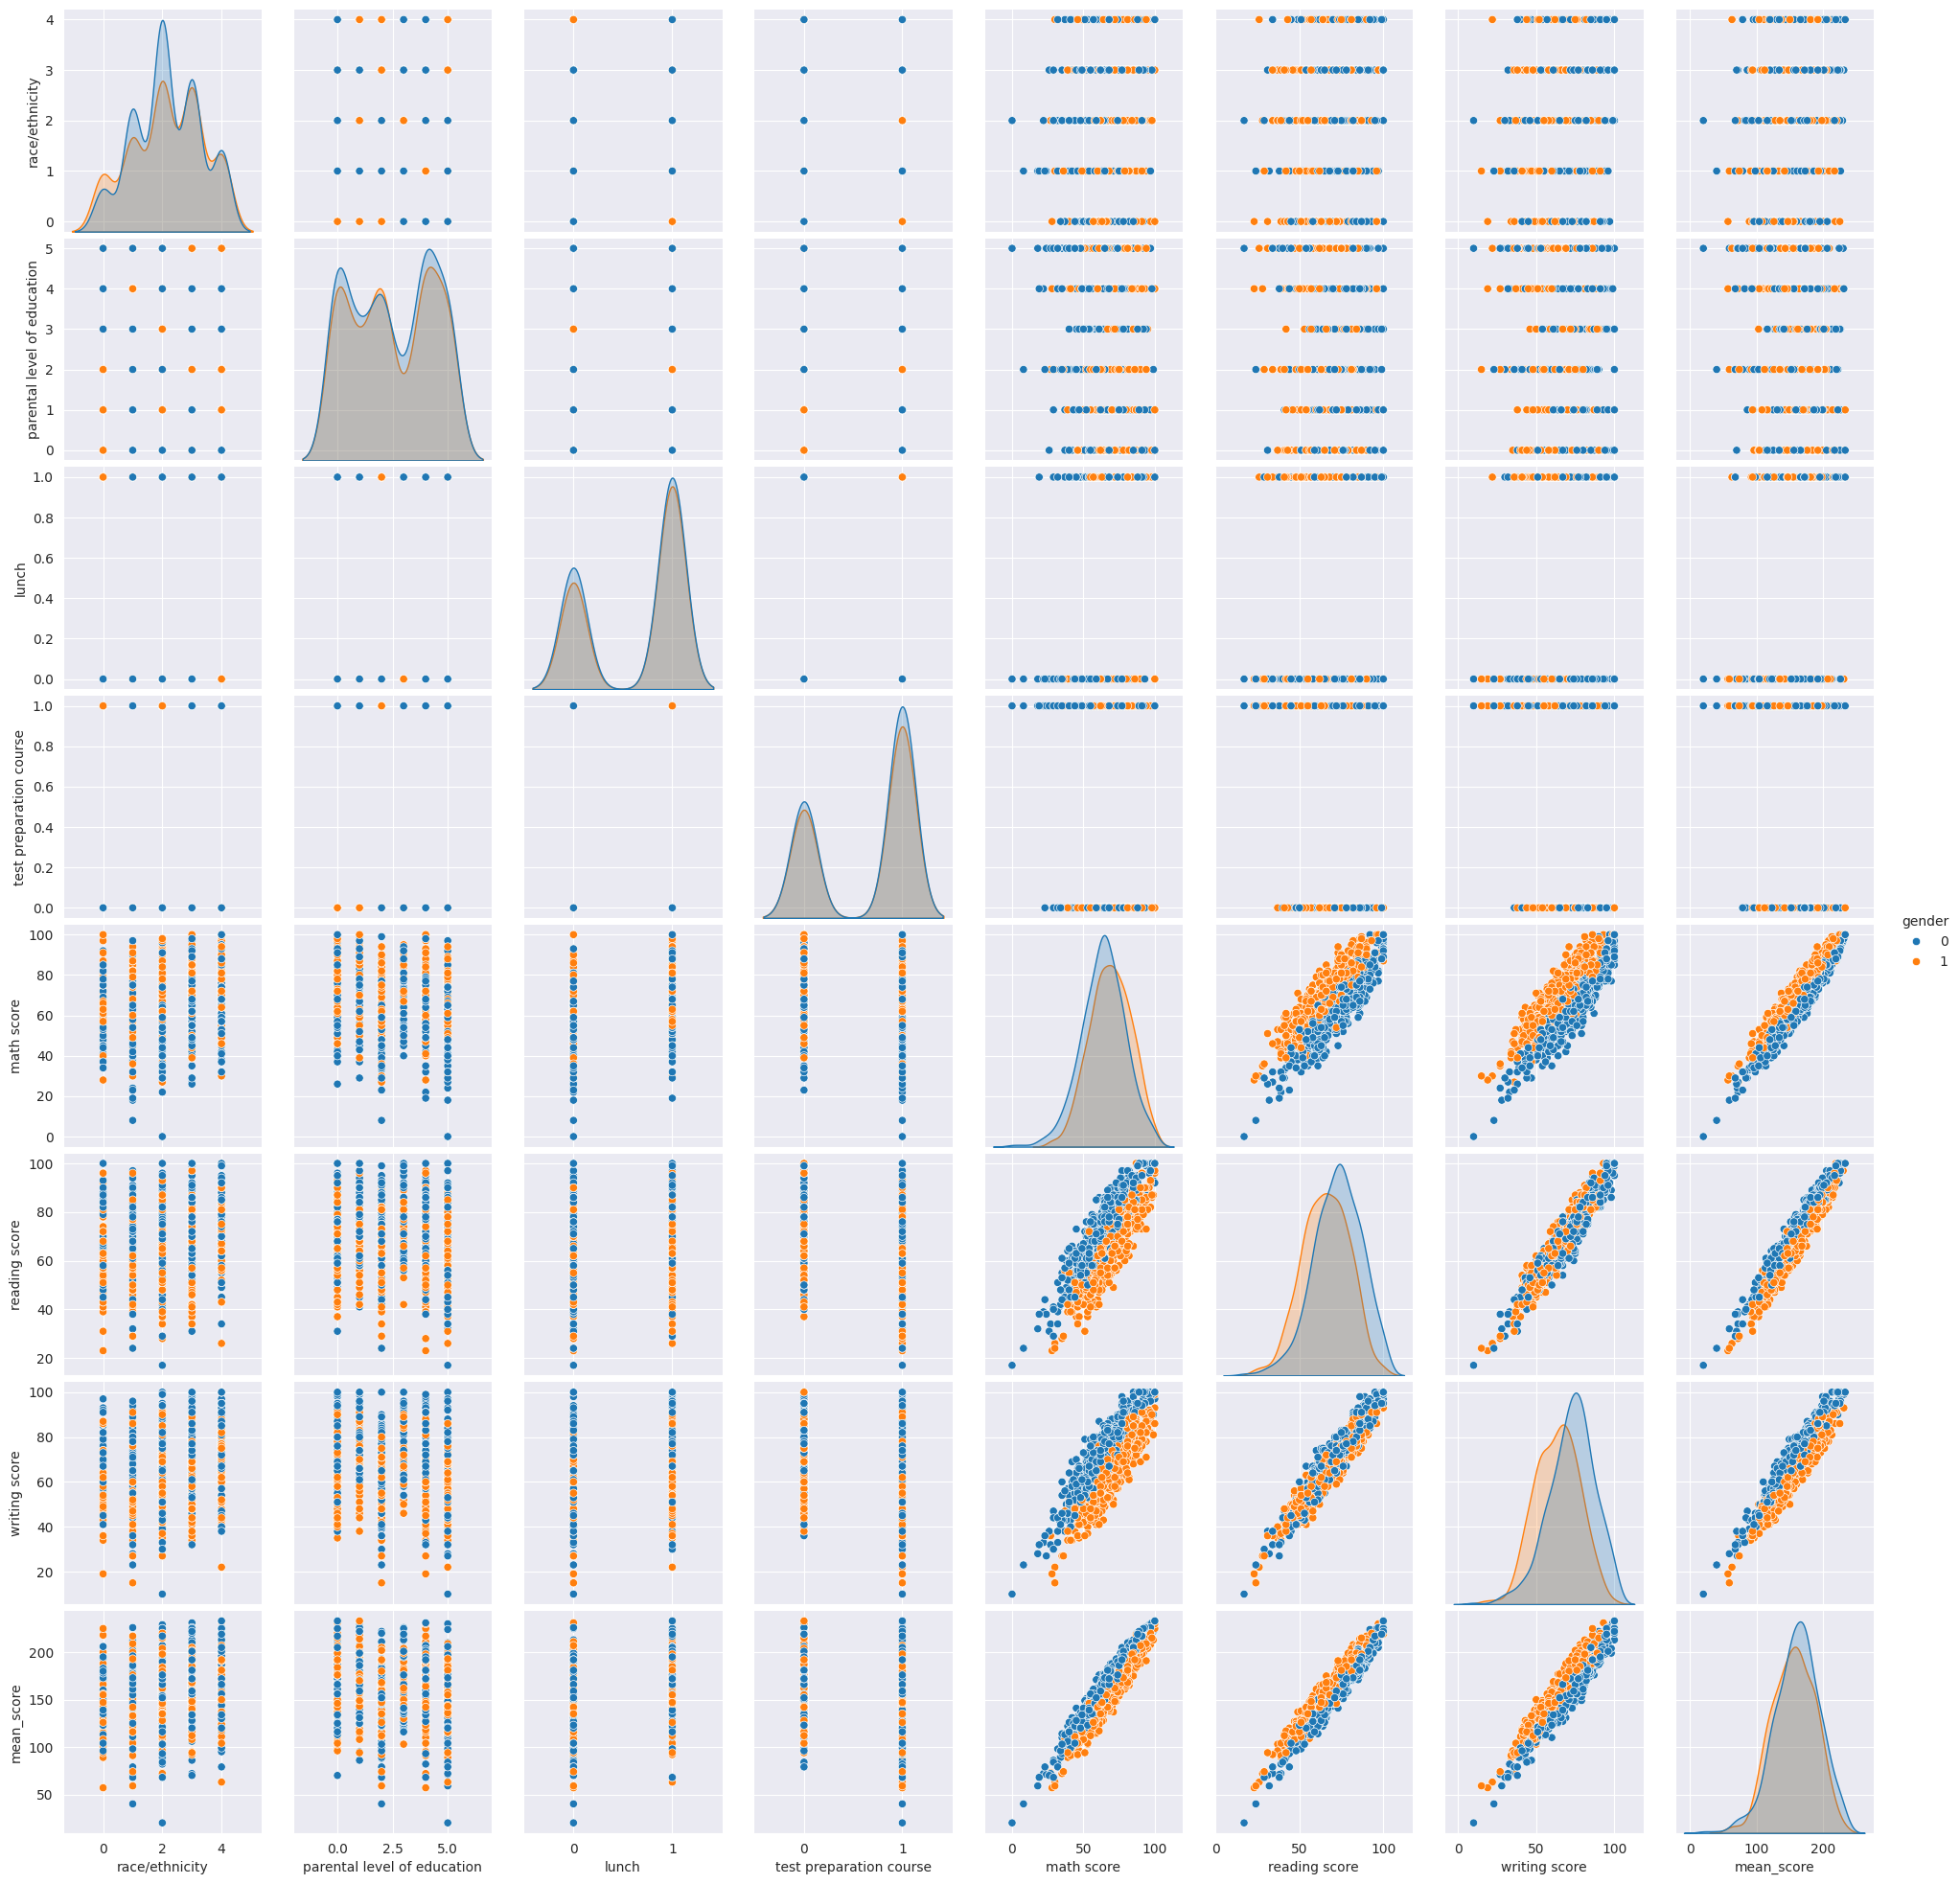

In [ ]:
plt.figure(figsize = (12, 6))
sns.pairplot(df, hue = "gender")
plt.show()

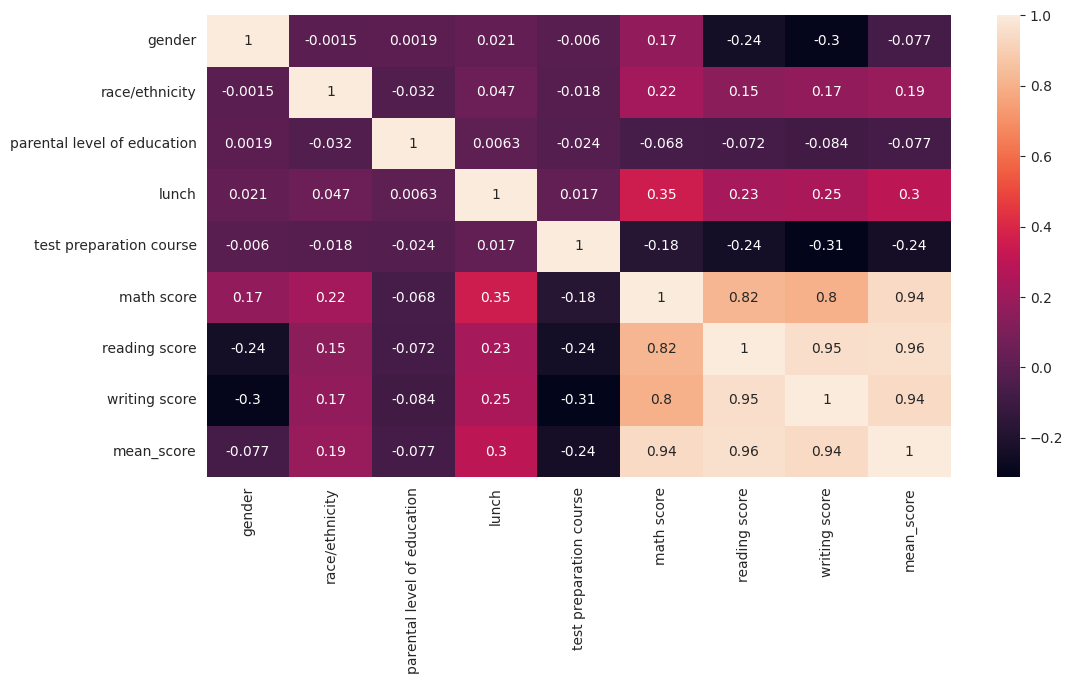

In [ ]:
plt.figure(figsize = (12, 6))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [ ]:
df = df.drop(["math score", "writing score", "reading score"], axis=1)
df.head()

#we have mean_score which is our target class

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mean_score
0,0,1,1,1,1,169.0
1,0,2,4,1,0,188.0
2,0,1,3,1,1,216.0
3,1,0,0,0,1,119.0
4,1,2,4,1,1,179.0


In [ ]:
#model buidling

from sklearn.model_selection import train_test_split
y = df['mean_score']
x = df.drop(['mean_score'], axis = 1)
x_train, x_test, y_train, ytest = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [ ]:
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print("x_test", x_test.shape)
print("y_test", ytest.shape)

x_train (800, 5)
y_train (800,)
x_test (200, 5)
y_test (200,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
model = LogisticRegression(solver = 'liblinear', random_state=0)

In [ ]:
model.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
p = model.predict(x_test)

In [ ]:
d = abs(p - ytest)

In [ ]:
d.mean()

27.025